In [105]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
def read_folder(folder_path):
    """
    Lists filenames in the folder.
    Takes folder path as a raw string. Returns list of filenames and list of sample names
    (extracted from filenames).
    
    Notice: filename regex is copiled strictly for the current task.
    """
    
    files = os.listdir(folder_path)
    pat_name = re.compile('(BT\d{4,5}-0.\d{2,3})')
    samples = [re.match(pat_name, file).group(1) for file in files if re.match(pat_name, file)]
    samples = pd.Series(samples).value_counts().sort_index()
    samples = list(samples.index)
    
    return files, samples


def dict_filenames(files, samples, keyword):
    """
    Given the folder with several files for each parameter measurement for each sample,
    creates dict of filenames where: keys are sample names, values are lists of according
    'diameter'/'length' filenames.
    
    files - list of fileanmes;
    samples - list of sample names;
    keyword - string, a parameter used to sort the content of files by filenames (here: 'diameter' or 'length' of particles, present in each filename)
    """
    
    files_dict = {}

    for file in files:
        for group in samples:
            if all(x in file for x in [group, keyword]):
                if group in files_dict:
                   files_dict[group].append(file)
                else:
                   files_dict[group] = [file]
    
    return files_dict


def read_files_to_df(folder_path, keyword):
    """
    Takes folder path, returns dataframe with measurements of samples parameter defined as keyword.
    
    Notice: here columns to read from files are strictly specified for the current task.
    
    folder_path - forder path in raw string
    keyword - 'diameter' or 'length'
    """
        
    df = pd.DataFrame()
    files, samples = read_folder(folder_path)
    files_dict = dict_filenames(files, samples, keyword)

    for sample_name, files_list in files_dict.items():
        sample_files_list = [pd.read_csv('\\'.join([folder_path, file]), usecols=['Length']) for file in files_list]
        temp_column = pd.concat(sample_files_list)
        temp_column.reset_index(drop=True, inplace=True)
        df = pd.concat([df, temp_column], axis=1, ignore_index=True)

    df.columns = [sample_name for sample_name in files_dict]
    
    return df

In [121]:
folder = r'D:\Documents\BT_morphology'

# let's see the folder contents
file_list, sample_list = read_folder(folder)
print('Folder contents:\n\nFiles list:\n{}\n\nSamples list:\n{}'.format(file_list, sample_list))

Folder contents:

Files list:
['BT16045-0.025_diameter.csv', 'BT16045-0.025_diameter1.csv', 'BT16045-0.025_length.csv', 'BT16045-0.025_length_1.csv', 'BT16045-0.15_diameter.csv', 'BT16045-0.15_diameter_1.csv', 'BT16045-0.15_length.csv', 'BT16045-0.15_length_1.csv', 'BT16090-0.025_diameter.csv', 'BT16090-0.025_length.csv', 'BT16090-0.15_diameter.csv', 'BT16090-0.15_diameter_1.csv', 'BT16090-0.15_length.csv', 'BT16090-0.15_length1.csv', 'BT16090-0.15_length_1.csv', 'BT21045-0.025_diameter.csv', 'BT21045-0.025_diameter_recalc.csv', 'BT21045-0.025_length.csv', 'BT21045-0.15_diameter.csv', 'BT21045-0.15_diameter_1.csv', 'BT21045-0.15_length.csv', 'BT21045-0.15_length_1.csv', 'BT2106-0.025_diameter.csv', 'BT2106-0.025_diameter_1.csv', 'BT2106-0.025_length.csv', 'BT2106-0.025_length_high_magn.csv', 'BT2106-0.15_diameter.csv', 'BT2106-0.15_diameter1.csv', 'BT2106-0.15_diameter_2.csv', 'BT2106-0.15_length.csv', 'BT2106-0.15_length_1.csv', 'BT21090-0.025_diameter.csv', 'BT21090-0.025_diameter_1.

In [122]:
# reading files
diam_df = read_files_to_df(folder, 'diameter')
length_df = read_files_to_df(folder, 'length')
display(diam_df, length_df)

,BT16045-0.025,BT16045-0.15,BT16090-0.025,BT16090-0.15,BT21045-0.025,BT21045-0.15,BT2106-0.025,BT2106-0.15,BT21090-0.025,BT21090-0.15
0,0.221,0.206,0.122,0.392,0.714,0.130,0.306,0.333,0.457,0.395
1,0.345,0.300,0.135,0.291,0.195,0.430,0.435,0.576,0.160,0.260
2,0.103,0.209,0.070,0.356,0.272,0.194,0.283,0.183,0.118,0.366
3,0.210,0.280,0.122,0.264,0.195,0.272,0.206,0.170,0.134,0.214
4,0.124,0.393,0.119,0.313,0.383,0.264,0.150,0.150,0.144,0.253
...,...,...,...,...,...,...,...,...,...,...
109,NaN,NaN,NaN,NaN,0.195,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,0.333,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,0.237,NaN,NaN,NaN,NaN,NaN
112,NaN,NaN,NaN,NaN,0.353,NaN,NaN,NaN,NaN,NaN


,BT16045-0.025,BT16045-0.15,BT16090-0.025,BT16090-0.15,BT21045-0.025,BT21045-0.15,BT2106-0.025,BT2106-0.15,BT21090-0.025,BT21090-0.15
0,10.281,5.101,11.119,4.860,6.016,3.865,12.858,3.926,8.375,7.026
1,18.923,2.582,5.522,4.722,1.332,2.775,8.134,2.813,12.937,5.241
2,5.776,2.452,15.774,2.757,0.868,4.010,7.351,3.856,7.963,5.945
3,2.699,3.547,8.704,9.087,11.287,5.581,2.525,5.537,5.242,2.850
4,9.744,4.082,11.097,7.523,14.350,2.646,8.016,1.384,7.600,14.457
...,...,...,...,...,...,...,...,...,...,...
171,NaN,NaN,NaN,6.233,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,8.957,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,4.510,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,7.350,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# create a df with mean diameter and length values
pivot = pd.concat([diam_df.mean(), length_df.mean()], axis=1)
pivot.columns = ['Mean_diameter', 'Mean_length']
pivot

,Mean_diameter,Mean_length
BT16045-0.025,0.230888,6.976037
BT16045-0.15,0.253383,4.073300
BT16090-0.025,0.359298,7.277117
BT16090-0.15,0.381283,5.475364
BT21045-0.025,0.357956,7.140220
BT21045-0.15,0.283971,4.095900
BT2106-0.025,0.240240,5.105017
BT2106-0.15,0.327633,2.779550
BT21090-0.025,0.288238,6.940400
BT21090-0.15,0.199838,4.243037


(0, 8.5)

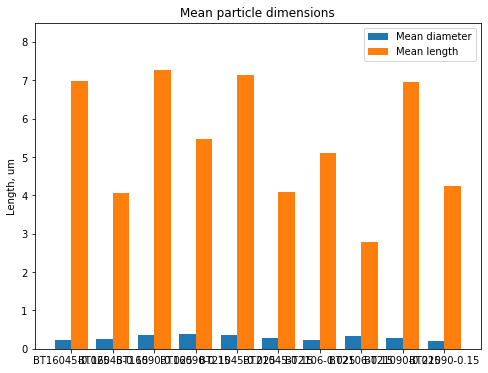

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.bar(x=pivot.index, height=pivot['Mean_diameter'], width=-0.4, align='edge', label='Mean diameter')
ax.bar(x=pivot.index, height=pivot['Mean_length'], width=0.4, align='edge', label='Mean length')

ax.set_title('Mean particle dimensions')
ax.set_ylabel('Length, um')
ax.legend()
ax.set_ylim(0, 8.5)

Text(0, 0.5, 'Length, um')

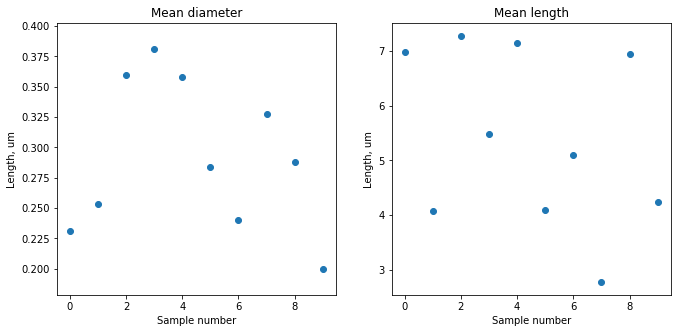

In [136]:
# visualizing obtained data

# x = np.array([0.025, 0.15] * 5)
# print(x)

x = np.arange(10)

fig, ax = plt.subplots(1, 2, figsize=(11, 5))

ax[0].scatter(x, pivot['Mean_diameter'])
ax[0].set_title('Mean diameter')
ax[0].set_xlabel('Sample number')
ax[0].set_ylabel('Length, um')

ax[1].scatter(x, pivot['Mean_length'])
ax[1].set_title('Mean length')
ax[1].set_xlabel('Sample number')
ax[1].set_ylabel('Length, um')